# Introducción a los Modelos de Clusterización de K-means

> Imaginemos un entorno social en el que hay grupos de personas que conversan en diferentes círculos alrededor de una sala. Cuando observamos la sala por primera vez, solo vemos un grupo de personas. Podríamos comenzar a colocar mentalmente puntos en el centro de cada grupo de personas y nombrar ese punto como un identificador único. Luego, podríamos referirnos a cada grupo con un nombre único para describirlos. Esto es básicamente lo que hace la agrupación de k-medias con los datos. 

<img src="image-20240829-094651.png" width="" align="" />

> En el lado izquierdo del diagrama anterior, podemos ver dos conjuntos distintos de puntos que no están etiquetados y están coloreados como puntos de datos similares. Al ajustar un modelo de k-medias a estos datos (lado derecho), se pueden revelar dos grupos distintos (mostrados en círculos y colores distintos). 

> En dos dimensiones, es fácil para los humanos dividir estos grupos, pero con más dimensiones, es necesario utilizar un modelo.

> En este tutorial, nos centraremos en la recopilación y división de datos (en la preparación de datos) y el ajuste de hiperparámetros, el entrenamiento del modelo y la evaluación del rendimiento del modelo (en el modelado). Gran parte del trabajo que implican los algoritmos de aprendizaje no supervisado consiste en el ajuste de hiperparámetros y la evaluación del rendimiento para obtener los mejores resultados del modelo.

# Conjunto de Datos

- California Housing Prices: disponible en https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download

# Contenido

Los datos corresponden a las casas que se encuentran en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. ¡Tenga en cuenta que los datos no están depurados, por lo que se requieren algunos pasos de preprocesamiento! Las columnas son las siguientes, sus nombres se explican por sí solos:

- longitud

- latitud

- edad media de la vivienda

- total_habitaciones

- total_dormitorios

- población

- hogares

- ingreso mediano

- valor medio de la vivienda

- proximidad al océano

# Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


In [22]:
(lambda: DeepnoteChart(home_data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"median_house_value","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(home_data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"bar","color":"#2266D3","tooltip":true},"encoding":{"x":{"bin":true,"axis":{"grid":false},"sort":null,"type":"quantitative","field":"median_house_value","format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","scale":{"type":"linear"},"format":{"type":"default","decimals":null},"aggregate":"count","formatType":"numberFormatFromNumberType"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"aditionalTypeInfo":{"histogramLayerIndexes":[0]},"tooltipDefaultMode":true}}"""))()

> Los datos incluyen 3 variables que hemos seleccionado mediante el usecols parámetro:

- Longitud: Valor que representa la distancia al oeste de una casa. Los valores más altos representan casas que están más al oeste.

- Latitud: valor que representa la distancia al norte de una casa. Los valores más altos representan casas que están más al norte.

- Median_house_value: el precio medio de las viviendas dentro de un bloque medido en USD. 

# Visualización de los Datos

In [4]:
(lambda: DeepnoteChart(home_data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"longitude","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"latitude","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"median_house_value","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(home_data, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"circle","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"longitude","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"latitude","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"sort":null,"type":"quantitative","field":"median_house_value","scale":{"scheme":"turbo"}}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

> Vemos que la mayoría de las casas caras se encuentran en la costa oeste de California, con diferentes áreas que tienen grupos de casas de precio moderado. Esto es de esperarse, ya que las propiedades frente al mar suelen valer más que las casas que no están en la costa. 

# Normalización de los Datos

> Cuando trabajamos con algoritmos basados ​​en la distancia, como el agrupamiento de k-medias, debemos normalizar los datos. Si no normalizamos los datos, las variables con diferentes escalas tendrán una ponderación diferente en la fórmula de distancia que se está optimizando durante el entrenamiento. Por ejemplo, si incluyéramos el precio en el grupo, además de la latitud y la longitud, el precio tendría un impacto descomunal en las optimizaciones porque su escala es significativamente mayor y más amplia que las variables de ubicación acotadas. 

> Primero configuramos divisiones de entrenamiento y prueba usando train_test_split from sklearn. 

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

> A continuación, normalizamos los datos de entrenamiento y prueba utilizando el preprocessing.normalize()método de sklearn. 

In [6]:
from sklearn import preprocessing

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

# Ajuste y Evaluación del Modelo

> Para la primera iteración, elegiremos arbitrariamente una cantidad de clústeres (a los que se hace referencia como k) de 3. Construir y ajustar modelos en sklearnes muy simple. Crearemos una instancia de KMeans, definiremos la cantidad de clústeres utilizando el atributo n_clusters, estableceremos n_init, que define la cantidad de iteraciones que ejecutará el algoritmo con diferentes semillas de centroide, en “automático”, y estableceremos en random_state0 para obtener el mismo resultado cada vez que ejecutemos el código. Luego, podemos ajustar el modelo a los datos de entrenamiento normalizados utilizando el fit()método .

In [7]:
print(X_train_norm.dtype)

float64


In [8]:
# Esto comprobará si algún elemento en el array no es numérico
non_numeric = np.array([x for x in X_train_norm.flatten() if not np.issubdtype(type(x), np.number)])
print("Non-numeric values in the array:", non_numeric)

Non-numeric values in the array: []


In [9]:
X_train_norm = X_train_norm.astype(float)

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
kmeans.fit(X_train_norm)

KMeans(n_clusters=3, random_state=0)

> Una vez ajustados los datos, podemos acceder a las etiquetas desde el atributo labels_. A continuación, visualizamos los datos que acabamos de ajustar. 

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

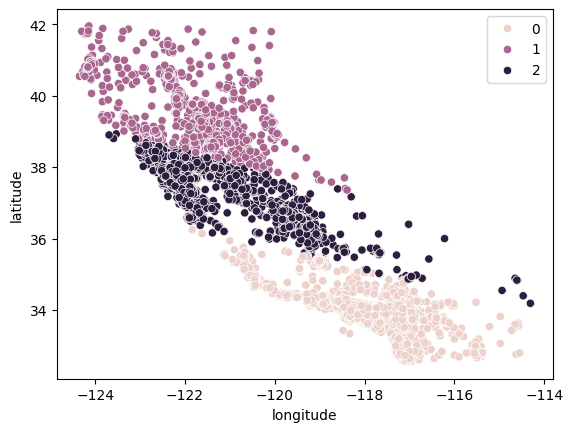

In [11]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

> Vemos que los datos ahora están claramente divididos en tres grupos distintos (norte de California, centro de California y sur de California). También podemos observar la distribución de los precios medios de las viviendas en estos tres grupos mediante un diagrama de caja. 

<AxesSubplot: ylabel='median_house_value'>

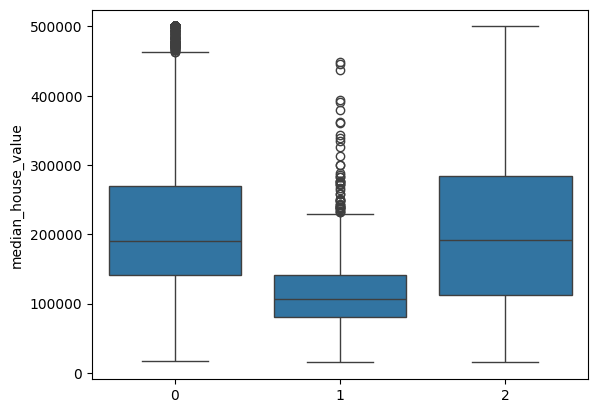

In [12]:
sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])

> Vemos claramente que los conglomerados Norte y Sur tienen distribuciones similares de valores medios de las viviendas (conglomerados 0 y 2) que son más altos que los precios en el conglomerado central (conglomerado 1). 

> Podemos evaluar el rendimiento del algoritmo de agrupamiento utilizando una puntuación Silhouette, que es una parte sklearn.metricsdonde una puntuación más baja representa un mejor ajuste.

In [13]:
from sklearn.metrics import silhouette_score

silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

0.7499371920703546

# Elegir el número de Clusters

> La debilidad de la agrupación en clústeres de k-medias es que no sabemos cuántos clústeres necesitamos con solo ejecutar el modelo. Necesitamos probar rangos de valores y tomar una decisión sobre el mejor valor de k. Normalmente tomamos una decisión utilizando el método Elbow para determinar la cantidad óptima de clústeres donde no estamos sobreajustando los datos con demasiados clústeres, ni tampoco subajustándolos con muy pocos. 

> Creamos el siguiente bucle para probar y almacenar diferentes resultados de modelos para que podamos tomar una decisión sobre la mejor cantidad de clústeres.

In [24]:
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init=10).fit(X_train_norm)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

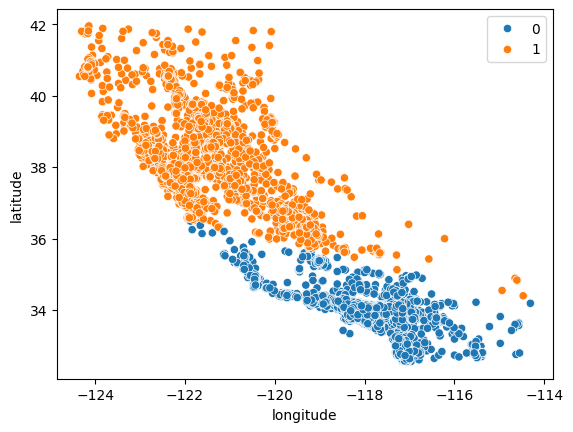

In [25]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)

> El modelo hace un buen trabajo al dividir el estado en dos mitades, pero probablemente no captura suficientes matices del mercado inmobiliario de California. 

> A continuación, miramos k = 4. 

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

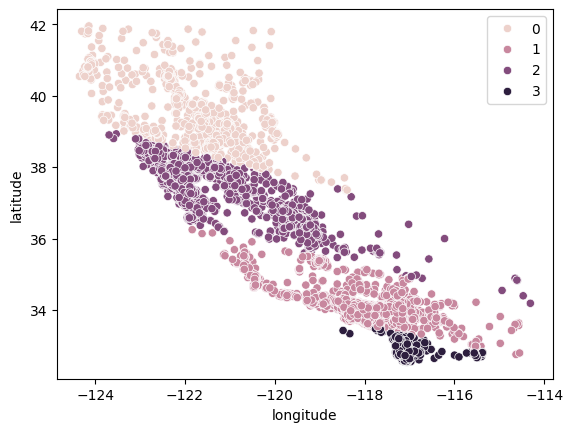

In [26]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

> Vemos que este gráfico agrupa a California en grupos más lógicos a lo largo del estado en función de qué tan al norte o al sur se encuentran las casas en el estado. Es muy probable que este modelo capte más matices en el mercado inmobiliario a medida que avanzamos por el estado. 

> Finalmente, miramos k = 7.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

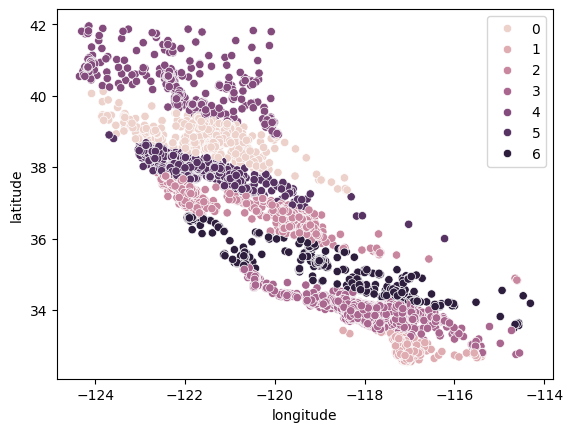

In [30]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[5].labels_)

> El gráfico anterior parece tener demasiados grupos. Hemos sacrificado la interpretación sencilla de los grupos a cambio de un resultado de agrupamiento geográfico "más preciso". 

> Por lo general, a medida que aumentamos el valor de K, observamos mejoras en los clústeres y lo que representan hasta cierto punto. Luego comenzamos a ver rendimientos decrecientes o incluso un peor desempeño. Podemos ver esto visualmente para ayudarnos a tomar una decisión sobre el valor de k utilizando un gráfico de codo donde el eje y es una medida de la bondad del ajuste y el eje x es el valor de k. 

<AxesSubplot: >

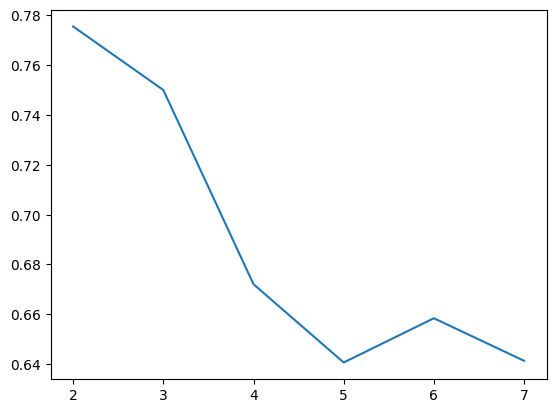

In [31]:
sns.lineplot(x = K, y = score)

> Normalmente elegimos el punto en el que las mejoras en el rendimiento comienzan a estabilizarse o empeorar. Vemos que k = 5 es probablemente lo mejor que podemos hacer sin sobreajuste. 

> También podemos ver que los grupos hacen un trabajo relativamente bueno al dividir California en grupos distintos y estos grupos se corresponden relativamente bien con diferentes rangos de precios, como se ve a continuación. 

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

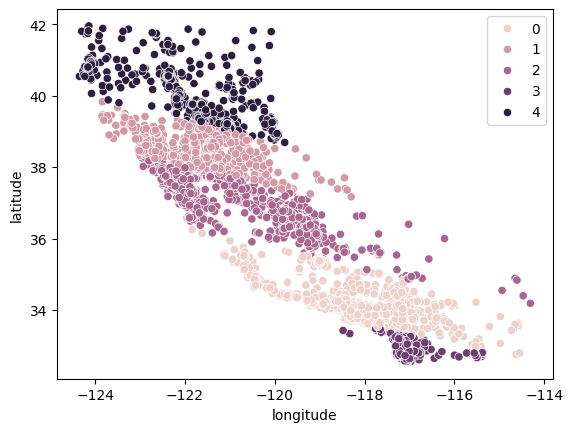

In [32]:
sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)

<AxesSubplot: ylabel='median_house_value'>

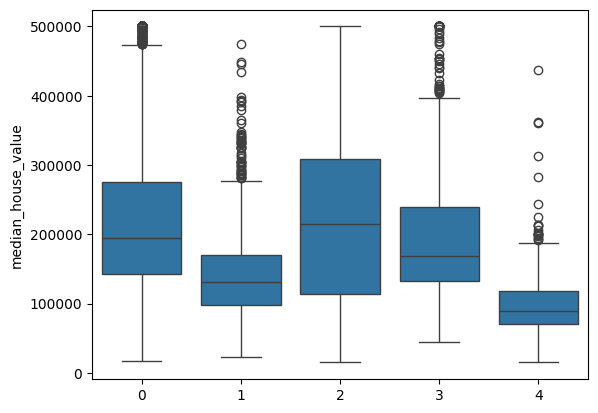

In [33]:
sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

# ¿Cuándo fallará el análisis de conglomerados k-means?

> La agrupación en clústeres de k-medias funciona mejor con datos esféricos. Los datos esféricos son aquellos que se agrupan en el espacio muy cerca unos de otros. Esto se puede visualizar en un espacio bidimensional o tridimensional con mayor facilidad. Los datos que no son esféricos o que no deberían serlo no funcionan bien con la agrupación en clústeres de k-medias. Por ejemplo, la agrupación en clústeres de k-medias no funcionaría bien con los datos que se muestran a continuación, ya que no podríamos encontrar centroides distintos para agrupar los dos círculos o arcos de forma diferente, a pesar de que visualmente son claramente dos círculos y arcos distintos que deberían etiquetarse como tales. 

<img src="image-20240829-174007.png" width="" align="" />

Puntuación promedio de silueta: 0.6406818824297292


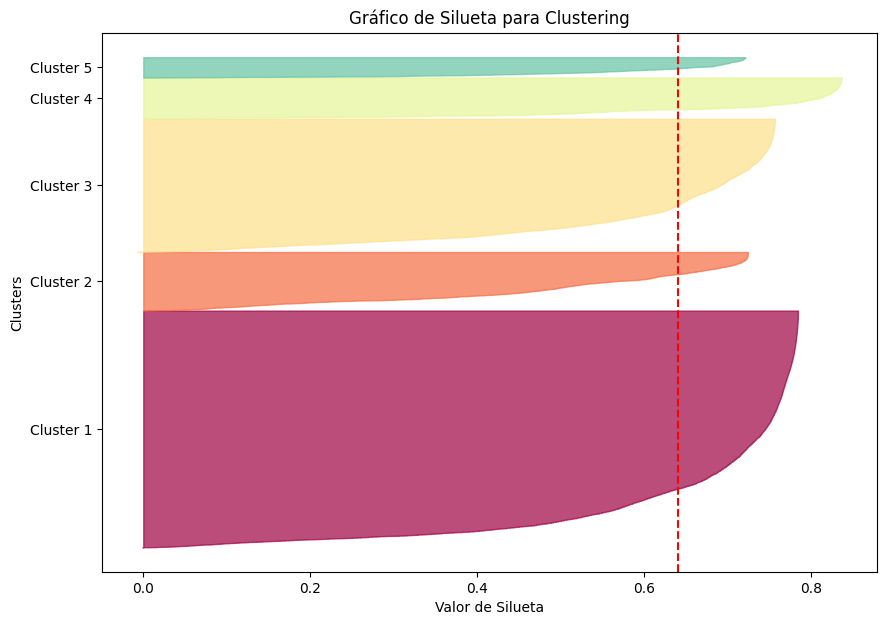

In [36]:
from sklearn.metrics import silhouette_samples, silhouette_score
# Calcular la puntuación de la silueta para cada muestra
cluster_labels = fits[3].labels_
silhouette_vals = silhouette_samples(X_train_norm, cluster_labels)

# Calcular el puntaje promedio de silueta
silhouette_avg = silhouette_score(X_train_norm, cluster_labels)
print(f"Puntuación promedio de silueta: {silhouette_avg}")

# Crear el gráfico de silueta
y_lower, y_upper = 0, 0
n_clusters = len(np.unique(cluster_labels))
yticks = []

plt.figure(figsize=(10, 7))

for i in range(n_clusters):
    # Agregar las puntuaciones de silueta para cada cluster
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()
    
    y_upper += len(ith_cluster_silhouette_vals)
    color = plt.cm.Spectral(float(i) / n_clusters)
    
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)
    
    yticks.append((y_lower + y_upper) / 2)
    y_lower = y_upper

plt.axvline(silhouette_avg, color="red", linestyle="--")  # Línea indicando el valor promedio de silueta
plt.yticks(yticks, [f'Cluster {i+1}' for i in range(n_clusters)])
plt.xlabel('Valor de Silueta')
plt.ylabel('Clusters')
plt.title('Gráfico de Silueta para Clustering')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7259eff7-2ff1-4036-829f-a7dbb19623c1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>